# Statistics
---

### Names: Solutions

This lab explores probability distributions, how they can be propogated through an equation, and how probabilities can be combined to estimate the parameters of a model. 

---


#### New Code:

This lab will introduce a number of different pieces of code, including code that can:


- Draw random numbers from a Poisson distribution
- Draw random numbers from a Gaussian distribution
- Calculate the probability density of a Poisson distribution at a given value
- Calculate the probability that a value drawn from a given Poisson distribution is greater than X
- Calculate the value X such that the probability of drawing a smaller value is P for a Poisson distribution
- Calculate the probability density of a Gaussian distribution at a given value
- Calculate the probability that a value drawn from a given Gaussian distribution is greater than X
- Calculate the value X such that the probability of drawing a smaller value is P for a Gaussian distribution

---

### Probability distributions

If we repeat an experiement many times (e.g. take many images of a star and measure its flux in each image) we will not obtain the same result every time. Instead we will obtain a range of different values, and the relative probability of each of these values is given by a probability distribution. In class we discussed the Poisson distribution (used for counting statistics) and the Gaussian distribution (used for most everything else). Python has built-in functions that allows us to draw values from a Poisson or Gaussian distribution. This can be useful if we want to model an experiment, or estimate the relative probability of obtaining different values. 


In [1]:
# Import useful packages
import numpy as np
import matplotlib.pyplot as plt

Lets first look at a Poisson distribution. Remember that the Poisson distribution is defined for integer values and is given by:

$P(x,\mu ) = \frac{\mu^x}{x!}\exp^{-\mu}$

where $\mu$ is the average value of the distribution. Poisson distributions apply to counting statistics, e.g. counting the number of photons that arrive at our detector.

Within python, we can draw a random number from a Poisson distribution. If we do this a large number of times, and plot a histogram of the different values drawn from this distribution, we can visualize the Poisson distribution


Text(0.5, 1.0, 'Poisson Distribution\n small mean')

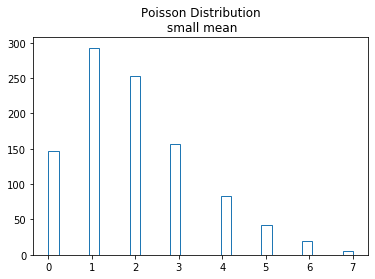

In [2]:
# Set the average value
mu = 2

# Draw 1000 random numbers from a Poisson distribution
poiss_data = np.random.poisson(mu,size=1000)

# Plot a histogram of the random numbers
plt.hist(poiss_data,30,histtype='step')
plt.title('Poisson Distribution\n small mean')

Next, lets look at a Gaussian distribution. The formula for a Gaussian distribution is:

$P(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}\exp^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} $

where $\mu$ is the mean of the distribution and $\sigma$ is the standard deviation. 

As with the Poisson distribution, we can draw random numbers from a Gaussian distribution. If we draw enough random numbers from this distribution, and plot a histogram of the result, we can visualize the Gaussian distribution.

Text(0.5, 1.0, 'Gaussian distribution')

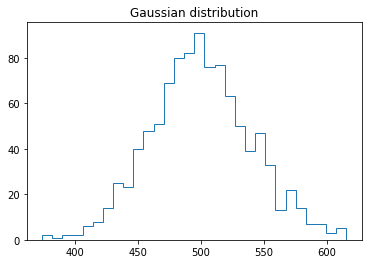

In [3]:
# Gaussian distribution
mean, std = 500,40

#Draw 1000 random numbers from a Gaussian distribution
gauss_data = np.random.normal(mean,std,size=1000)

plt.hist(gauss_data,30,histtype='step')
plt.title('Gaussian distribution')

Lets go through an exercise where we use the ability to generate random numbers.

The distance to a nearby object can be derived from the parallax by the following formula:

$d = 1/p$

where $d$ is the distance in units of parsecs and $p$ is the parallactic angle, in units of arc-seconds. GAIA is a european space telescope that has measured the parallaxes for over one billion stars. They discourage deriving the distance directly from objects with an error on the parallax of larger than 20%, but instead they suggest working directly with the parallax. Why is this?

Lets consider the star 55 Cnc. According to GAIA, it has p=0.079427$\pm$0.000077 arc-seconds.

> **Q:** Using the formula for distance, and what you know about error propogation, calculate the distance to 55 Cnc, and its uncertainty.

**d=12.59 $\pm$ 0.01 pc**

We can estimate the answer to the above question using random numbers. We first draw many random numbers from a Gaussian distribution with a mean and standard deviation given the parallax measurement and its uncertainty. We then apply the distance formula to these values, and look at the resulting distribution.

> **Q:** The code below performs this operation, but is missing important pieces, and contains some syntax errors. Fill in the missing pieces and fix the errors

Distance to 55 Cnc 12.590+-0.012


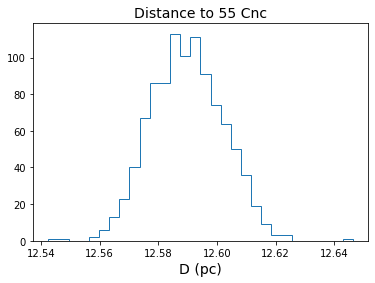

In [25]:
p_mean = 0.079427
p_std = 0.000077

p_gauss = np.random.normal(p_mean,p_std,size=1000)#Insert code to draw 1000 random numbers from a Gaussian distribution with mean of 0.079427 and standard deviation of 0.000077
d_gauss = 1/p_gauss

#Plot a histogram of the distances
plt.hist(d_gauss,30,histtype='step') #<- Missing ) here
plt.xlabel('D (pc)',fontsize=14)
plt.title('Distance to 55 Cnc',fontsize=14)

#Calculate the mean and standard deviation of the distances
mean_d = np.mean(d_gauss) #<- Should be np.mean not mean
std_d = np.std(d_gauss) #<- The variable in the parenthesese should be d_gauss not mean_d
print('Distance to 55 Cnc {:0.3f}+-{:0.3f}'.format(mean_d,std_d))

> **Q:** How does the mean and standard deviation estimated in the code block above compare to your direct estimate from the formula and propogation of errors?

**They are the same!**

Now lets consider what would happen if the uncertainty was larger. 

> **Q:** Copy the code block from above and increase the uncertainty on the parallax measurement to 0.016 arc-seconds (=20% of the parallax measurement). Using the distance formula, with the simple propogation of error prescription, would predict that d=12.6$\pm$2.5pc. Does this match the mean and standard deviation of the distribution of distance values? Does the distribution of distance values look like a Gaussian?

**The error propogation result does not match the result below. The distribution of distance values does not look like a Gaussian, but instead has a tail towards large distances. **

Distance to 55 Cnc 13.273+-3.245


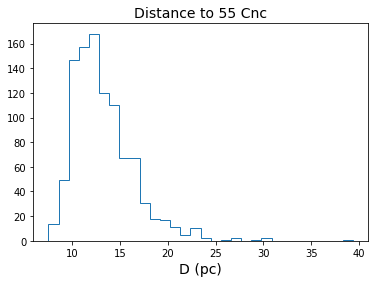

In [26]:
p_mean = 0.079427
p_std = 0.016

p_gauss = np.random.normal(p_mean,p_std,size=1000)#Insert code to draw 1000 random numbers from a Gaussian distribution with mean of 0.079427 and standard deviation of 0.000077
d_gauss = 1/p_gauss

#Plot a histogram of the distances
plt.hist(d_gauss,30,histtype='step') #<- Missing ) here
plt.xlabel('D (pc)',fontsize=14)
plt.title('Distance to 55 Cnc',fontsize=14)

#Calculate the mean and standard deviation of the distances
mean_d = np.mean(d_gauss) #<- Should be np.mean not mean
std_d = np.std(d_gauss) #<- The variable in the parenthesese should be d_gauss not mean_d
print('Distance to 55 Cnc {:0.3f}+-{:0.3f}'.format(mean_d,std_d))

Often times you might be interested in knowing the probability of drawing a certain value from a given distribution. For example, we take an image of a region of the sky and find that the background level has an average value of 100 electrons, with a standard deviation of 20 electrons (we will assume a Gaussian distribution). In part of the image we detect a signal of 145 electrons. How likely is it that the background could generate a signal this large? If it is highly unlikely, then we can safely assume that something else (e.g. a star, a galaxy) produced this signal. If we wanted to set a threshold such that less than 0.01% of the background pixels would exceed this threshold by random chance, what would the value of this threshold be?

Python has built in functions that can perform these calculations. We first must create a Gaussian object with a given mean and standard deviation.

In [27]:
# We need to import the scipy.stats package first
import scipy.stats

# Create a Gaussian object with a given mean and standard deviation
mean = 100
standard_deviation = 20
my_gauss_object = scipy.stats.norm(mean,standard_deviation)


Once this object has been created, we can use it to perform various calculations

In [28]:
#Probability of measuring a value of 145 or larger
prob_greaterthan145 = my_gauss_object.sf(145)
print('P(x>145): {:0.3f}'.format(prob_greaterthan145))

#Value X, such that the probability of getting a value less than X is the input
prob997_value = my_gauss_object.ppf(.997)
print('X, for which P(x<X) = 0.997: {:0.2f}'.format(prob997_value))



P(x>145): 0.012
X, for which P(x<X) = 0.997: 154.96


> **Q:** A recent image from our 24-inch telescope has a background level of 350 $\pm$ 30 ADUs. Suppose you wanted to set a threshold such that only 0.001% of the background pixels in this image would randomly be brighter than this threshold. What threshold value would you choose?

**477.9 ADU**

In [29]:
# Use this space to answer the above questions
my_gauss_object = scipy.stats.norm(350,30)
my_gauss_object.ppf(.99999)

477.9467238177152

A similar thing can be done with a Poisson distribution.

In [13]:
#Set up our Poisson distribution, with a given mean
mu = 2
my_poiss_dist = scipy.stats.poisson(mu)

#Probability that a value drawn from this distribution is greater than or equal to 10
prob_greaterthan10 = my_poiss_dist.sf(10)
print('P(x>10): {:0.5f}'.format(prob_greaterthan10))

#Value X, such that the probability of getting a value less than X is the input
prob997_value = my_poiss_dist.ppf(.997)
print('X, for which P(x<X) = 0.997: {}'.format(prob997_value))

P(x>10): 0.00001
X, for which P(x<X) = 0.997: 7.0


### Combining probability distributions

Often we are concerned with the probability that multiple different events have occured simultaneously. What is the probability that the flux in one pixel is very high, and the flux in the pixel right next to it is also very high?

Let's consider a simple example. Suppose you measure the distance to a particular star (star A) to be d=410$\pm$30 pc. From other information you know that this star is part of a cluster of stars, and that the measured distance to this star is 350 pc. 

What is the probability of measuring the distance star A that you found, assuming that it is actually at 350 pc? This is the same as asking the question: if we had a Gaussian distribution with a mean of 350 and a standard deviation of 30, what is the probability that we would randomly draw the value 410 from this distribution? We can turn to our Gaussian object

> **Q:** Modify the code block below to create the necessary Gaussian object. 

In [14]:
da_gauss = scipy.stats.norm(350,30) #<-- Insert a mean of 350 and a standard deviation of 30 for this object

#Calculate the probability of measuring a distance of 410. 
probA = da_gauss.pdf(410)
print('P(dA=410) = {:0.3e}'.format(probA))

P(dA=410) = 1.800e-03


Now suppose that you measured the distance to another star in the same cluster, and you found its distance to be d=450$\pm$40 pc. Both of these are above the assumed distance of the cluster, but the uncertainties are large. What is the probability that we would make both of these measurements, assuming both stars are at a distance of 350pc?

In that case we multiply the probabilities together:

$P(d_A=410$ and $d_B=450) = P(d_A=410)*P(d_B=450)$

> **Q:** What is the probability of measuring a distance of 450 pc for star B, assuming it is part of the cluster at 350 pc? What is the probability of measuring star A at a distance of 410 pc AND star B at a distance of 450 pc? Modify the code block below to answer these questions.


In [15]:
db_gauss = scipy.stats.norm(350,40) #<-- Insert a mean of 350 and a standard deviation of 40 in this object

probB = db_gauss.pdf(450)#Insert code to calculate the probability of measuring a distance of 450 pc for star B
print('P(dA=410) = {:0.3e}'.format(probB))

probAB = probA*probB
print('P(dA=410 and dB=450) = {:0.3e}'.format(probAB))

P(dA=410) = 4.382e-04
P(dA=410 and dB=450) = 7.886e-07


Now suppose that we measure the distances to a handful of other stars:

|Star| Distance|
|:----:|:---------:|
|C   | 390$\pm$30 pc|
|D   | 420$\pm$30 pc|
|E   | 350$\pm$80 pc|
|F   | 450$\pm$10 pc|


With these additional measurements, you may start to notice that they are all larger than the previously estimated distance to the cluster. Maybe there is something wrong with that distance... Can we find a better distance estimate to the cluster?

Assuming all of these stars are at the same distance, we can estimate the *most likely* distance to the cluster. To do this we can estimate the probability of measuring all of these distance for different values of the cluster distance. We can then determine the cluster distance for which the combined probability is the highest.

> **Q:** The function below is desinged to calculate the combined probability of measuring the distances to all of these stars, assuming that they are all at the same distance. The function takes as an input the assumed common distance and returns the combined probability. Fill in the missing lines of the code to complete the function.

In [23]:
def calc_combined_prob(cluster_distance = 350): #<-- Modify this line so that it takes the cluster distance as the input, with a default value of 350.

    distances = [410,450,390,420,350,450]
    uncertainties = [30,40,30,30,80,10]#Create a list of the uncertainties


    prob_total = 1
    for i in range(len(distances)):
        gauss_object = scipy.stats.norm(cluster_distance,uncertainties[i])#Insert code to create a Gaussian object with mean given by the cluster distance, and standard deviation given by the uncertainty to the particular star
        prob_this_star = gauss_object.pdf(distances[i])#Insert code to use the created Gaussian object to estimate the probability of getting the measured distance to a star
        prob_total *= prob_this_star #<- This line is equivalent to prob_total = prob_total * prob_this_star
    
    #Insert code here that returns the prob_total variable
    return(prob_total)

> **Q:** Using the above function, calculate the combined probabilities for each of the cluster distances below. What is the most likely distance of the cluster?

|Cluster Distance (pc)| Probability|
|:-------------------:|:----------:|
|350|1.44e-37|
|370|6.36e-28|
|390|9.89e-21|
|410|5.42e-16|
|430|1.05e-13|
|450|7.21e-14|
|470|1.74e-16|
|490|1.49e-21|

The distance with the highest likelihood is 430 pc

In [24]:
for cd in [350,370,390,410,430,450,470,490]:
    print('Combined probability = {:0.3e}'.format(calc_combined_prob(cd)))

Combined probability = 1.446e-37
Combined probability = 6.362e-28
Combined probability = 9.888e-21
Combined probability = 5.428e-16
Combined probability = 1.053e-13
Combined probability = 7.209e-14
Combined probability = 1.744e-16
Combined probability = 1.490e-21


With that you have done your first maximum likelihood estimate! These estimates are common when trying to determine the most likely parameters in a model. Here we used a simple model (all of the stars are at a common distance) but more complicated models are possible (the cluster has an ellipsoidal shape, within unknown sizes in each direction). The basic idea is that you have a set of data, and you have a model that predicts the relative probability of measuring different values of that data. You then vary the parameters of the model until you maximize the probability of obtaining the data.

We can also relate what you have done to the concept of 'minimizing the chi-squared', which is something you may have heard of in other classes or in research.

Consider what we have done as a formula. The combined probability of measuring the distances to all of these stars is:

$P_{total} = P(d_A|d_{cluster})P(d_B|d_{cluster})P(d_C|d_{cluster})P(d_D|d_{cluster})P(d_E|d_{cluster})P(d_F|d_{cluster})$

where $d_A$ is the distance to star A, $d_{cluster}$ is the distance to the cluster, and $P(d_A|d_{cluster})$ is the probability of measuring star A at a distance $d_A$ assuming it is actually at a distance $d_{cluster}$

Each of these probabilities are given by Gaussian distributions

$P(d_A) \propto \exp(-(d_A-d_{cluster})/2\sigma_A^2)$

where $\sigma_A$ is the uncertainty on our distance measurement. If we combine all of the probabilities, we are multiplying a set of exponentials, which can be written in shortened form as:

$P_{total} \propto \prod_{i=1}^{n} \exp(-(d_i-d_{cluster})/2\sigma_i^2)$

where the $i$ index loops over all of the stars.

Multiplying exponentials is equivalent to summing the exponent

$P_{total} \propto \prod_{i=1}^{n} \exp(-(d_i-d_{cluster})/2\sigma_i^2) = \exp(-\frac{1}{2}\sum_{i=1}^{n}(d_i-d_{cluster})/\sigma_i^2)$

$P_{total} \propto \exp(-\frac{1}{2}\chi^2)$

where we have defined $\chi^2 = \sum_{i=1}^{n}(d_i-d_{cluster}/\sigma_i^2)$. Maximizing the probability of a model is equivalent to mimizing the $\chi^2$! (under the assumption of Gaussian uncertainties)


**Stop Here**

Complete Part 2 of the code recall activity. Email this notebook, the code recall activity, and the pseudo-code acitivity to kmf4@williams.edu